In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as op
import numpy as np

# for plotting
sns.set(style='ticks', font_scale=1, context='poster')
%matplotlib inline

In [4]:
ratings_file = '/Volumes/group/awagner/sgagnon/SST/analysis/behav/group_inscanratings.csv'
group_file = '/Users/thackery/Work/SST/data/subj_info.csv'

In [5]:
group_info = pd.read_csv(group_file)
d = pd.read_csv(ratings_file)

In [6]:
group_info.tail()

,subid,group,remove
38,50,control,NaN
39,54,stress,NaN
40,55,stress,NaN
41,56,stress,NaN
42,57,control,NaN


In [7]:
d.head()

,subid,rating,run1,run2,run3,run4,run5,run6,run7,run8
0,3,Anxious,1,1,2,2,1,1,1,2
1,3,Happy,4,2,4,3,4,4,4,4
2,3,Safe,4,4,4,4,4,4,4,4
3,3,Stressed,2,1,1,2,1,1,2,1
4,3,Emotional arousal,1,1,2,1,4,2,4,4


In [8]:
group_info = pd.read_csv(group_file)
d = pd.read_csv(ratings_file)
d = d.merge(group_info).drop('remove', axis=1)
d.head()

,subid,rating,run1,run2,run3,run4,run5,run6,run7,run8,group
0,3,Anxious,1,1,2,2,1,1,1,2,control
1,3,Happy,4,2,4,3,4,4,4,4,control
2,3,Safe,4,4,4,4,4,4,4,4,control
3,3,Stressed,2,1,1,2,1,1,2,1,control
4,3,Emotional arousal,1,1,2,1,4,2,4,4,control


In [9]:
d = pd.melt(d, id_vars=['subid', 'rating', 'group'], var_name='run')
d['other'] = np.nan
d[['other', 'run']] = d.run.str.split('run').tolist()
d.drop('other', axis=1, inplace=True)
d.head()

,subid,rating,group,run,value
0,3,Anxious,control,1,1
1,3,Happy,control,1,4
2,3,Safe,control,1,4
3,3,Stressed,control,1,2
4,3,Emotional arousal,control,1,1


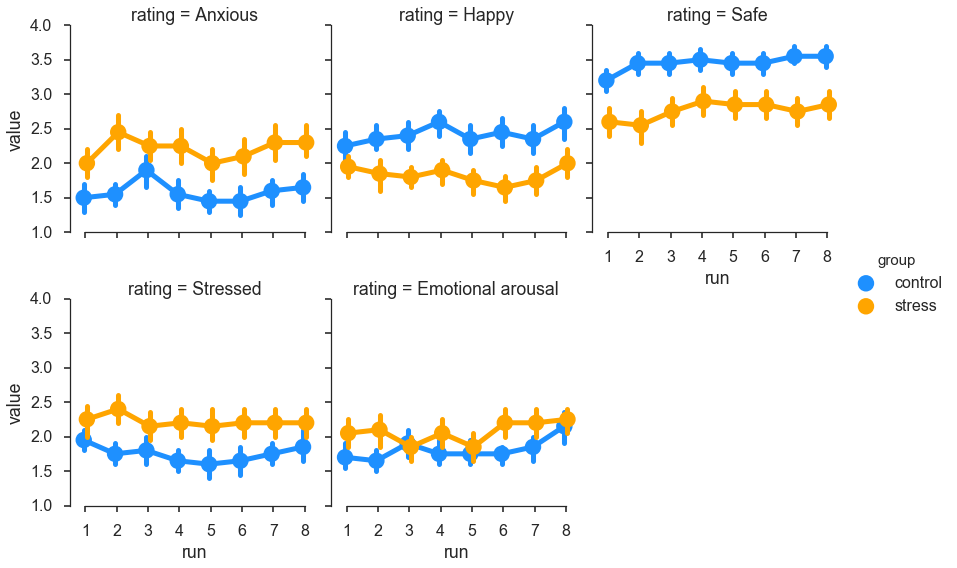

In [15]:
p = sns.factorplot(x='run', y='value', hue='group', col='rating', col_wrap=3,
                   palette=['dodgerblue', 'orange'],
                   data=d, ci=68, dodge=.1, aspect=1, units='subid')
sns.despine(trim=True)

## Compute composite scores

In [17]:
d_neg = pd.DataFrame(d.loc[d.rating == 'Anxious',['subid', 'run', 'group']])
d_neg['negative'] =(d.loc[d.rating == 'Anxious','value'].values + d.loc[d.rating == 'Stressed','value'].values)/2

d_pos = pd.DataFrame(d.loc[d.rating == 'Happy',['subid', 'run', 'group']])
d_pos['positive'] =(d.loc[d.rating == 'Happy','value'].values + d.loc[d.rating == 'Safe','value'].values)/2

In [18]:
d_valence = pd.merge(d_neg, d_pos)
d_valence = pd.melt(d_valence, id_vars=['subid', 'run', 'group'], 
                    var_name='valence', value_name='rating')
d_valence.head()

,subid,run,group,valence,rating
0,3,1,control,negative,1
1,4,1,control,negative,2
2,5,1,control,negative,1
3,6,1,control,negative,1
4,7,1,control,negative,1


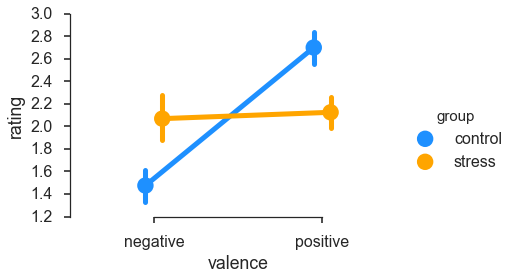

In [19]:
data = d_valence.groupby(['subid', 'group', 'valence']).mean().reset_index()

p = sns.factorplot(x='valence', y='rating', hue='group',
                   palette=['dodgerblue', 'orange'],
                   data=data, ci=68, dodge=.1, aspect=1.5, units='subid')
sns.despine(trim=True)

plt.savefig('/Volumes/group/awagner/sgagnon/SST/analysis/behav/group_inscanratings.png', dpi=300)